In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("netflix_titles.csv")
data.shape

(7787, 12)

In [3]:
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
## LabelEncoder kategoric veriyi sayısala dönüştürüyoruz
from sklearn import preprocessing
data=pd.read_csv("netflix_titles.csv")
lb=preprocessing.LabelEncoder()

yedekKolon1=lb.fit_transform(data[["show_id"]])
data["show_id"]=yedekKolon1

##datayı yedekliyoruz id ler ve gerçek bilgileri saklamak için
yedekData=data

yedekKolon2=lb.fit_transform(data[["type"]])
data["type"]=yedekKolon2 ## 1->tvShow   0->movie

##LabelEncoder ile fit edileceği için hata vermemesi için null değer bulunna kolonlardaki null değerleri siliyoruz
data.dropna(subset=["country","director","rating","release_year"],inplace=True)

yedekKolon3=lb.fit_transform(data[["country"]])
data["country"]=yedekKolon3

yedekKolon4=lb.fit_transform(data[["director"]])
data["director"]=yedekKolon4

yedekKolon5=lb.fit_transform(data[["rating"]])
data["rating"]=yedekKolon5

##her hangi bir şekilde sayısal değere otomatik olarak dönüştürülmesi sonucunda çok uzun ve karmaşık string ifadeler
##bulunduğundan bir işe yaramayacak olan kolonları çıkarıyoruz
data.drop(columns=["title","cast","date_added","duration","listed_in","description"],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [6]:
data.head(1) ## 1->tvShow   0->movie

,show_id,type,director,country,release_year,rating
1,1111,0,1788,264,2016,8


In [7]:
data.iloc[:,1:5].head(1)## datada girdi kolonları

,type,director,country,release_year
1,0,1788,264,2016


In [8]:
data.corr()

,show_id,type,director,country,release_year,rating
show_id,1.000000,-0.012271,-0.001755,0.034366,-0.018371,-0.034239
type,-0.012271,1.000000,-0.008414,-0.000040,0.071756,0.110339
director,-0.001755,-0.008414,1.000000,-0.029612,-0.049467,0.024872
country,0.034366,-0.000040,-0.029612,1.000000,-0.046425,-0.173876
release_year,-0.018371,0.071756,-0.049467,-0.046425,1.000000,0.223505
rating,-0.034239,0.110339,0.024872,-0.173876,0.223505,1.000000


In [9]:
##Backward Elimination
import statsmodels.api as sm

data["ekKolon B0 için"]=np.ones(5189)

data_BW=data.iloc[:,[1,2,3,4,6]].values
data_BW=np.array(data_BW,dtype=float)
model=sm.OLS(data.iloc[:,5],data_BW).fit()
print(model.summary())
## 0.05(hata payı P>|t|) den büyük olan kolonları çıkarıp tekrar kontrol ediyoruz.

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     123.1
Date:                Sat, 13 Mar 2021   Prob (F-statistic):          1.55e-100
Time:                        00:58:35   Log-Likelihood:                -10659.
No. Observations:                5189   AIC:                         2.133e+04
Df Residuals:                    5184   BIC:                         2.136e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0624      0.148      7.175      0.0

In [10]:
data.head(1)

,show_id,type,director,country,release_year,rating,ekKolon B0 için
1,1111,0,1788,264,2016,8,1.0


In [11]:
data.drop(columns=["ekKolon B0 için"],inplace=True)
data.head(1)

,show_id,type,director,country,release_year,rating
1,1111,0,1788,264,2016,8


In [12]:
data.iloc[:,1:5].head(1)

,type,director,country,release_year
1,0,1788,264,2016


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:5] , data["rating"] , test_size=0.33,random_state=0)

In [14]:
##Linear-MultiLinear(more column than one) Predict
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
predLinear=LR.predict(x_test)

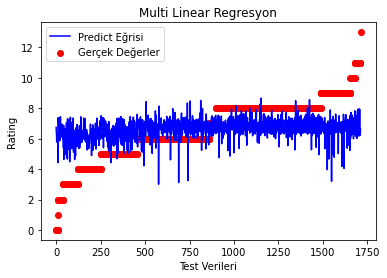

In [15]:
##sort and plot
df=pd.DataFrame(data=y_test)
df["predict"]=predLinear
df=df.sort_values(by=["rating"])

fig, ax = plt.subplots()
ax.scatter(range(0,1713,1), df["rating"],color="red",label="Gerçek Değerler")
ax.plot(range(0,1713,1), df["predict"],color="blue",label="Predict Eğrisi")
ax.set(xlabel='Test Verileri', ylabel='Rating',
       title='Multi Linear Regresyon')
##ax.grid()
plt.legend()
plt.show()

In [16]:
##Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
polyReg=PolynomialFeatures(degree=5)
X=x_test.values
Y=y_test.values
x_poly=polyReg.fit_transform(X)

linReg=LinearRegression()
linReg.fit(x_poly,y_test)

predPoly=linReg.predict(polyReg.fit_transform(X))

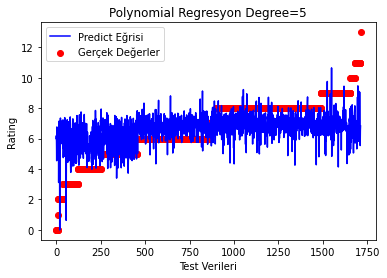

In [17]:
df3=pd.DataFrame(data=y_test)
df3["predict"]=predPoly
df3=df3.sort_values(by=["rating"])

fig, ax2 = plt.subplots()
ax2.scatter(range(0,1713,1), df3["rating"],color="red",label="Gerçek Değerler")
ax2.plot(range(0,1713,1), df3["predict"],"b",label="Predict Eğrisi")

ax2.set(xlabel='Test Verileri', ylabel='Rating',
       title='Polynomial Regresyon Degree=5')
plt.legend()
plt.show()

In [18]:
## Scaler Ölçekleme
from sklearn.preprocessing import StandardScaler
X=x_test.values
Y=y_test.values

sc1=StandardScaler()
x_olcekli=sc1.fit_transform(X)
sc2=StandardScaler()
y_olcekli=sc2.fit_transform(Y.reshape(-1,1))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


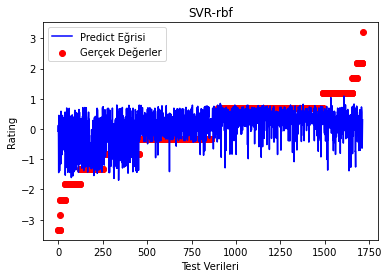

In [19]:
##Support Vector Regressiom *Ölçekli veri kullanmamız gerekiyor
from sklearn.svm import SVR
svr_reg=SVR(kernel='rbf')
svr_reg.fit(x_olcekli,y_olcekli)

dfSVR=pd.DataFrame(data=y_olcekli)
dfSVR["predict"]=svr_reg.predict(x_olcekli)
dfSVR=dfSVR.rename(columns={0: "rating"})
dfSVR=dfSVR.sort_values(by="rating")

fig, ax4 = plt.subplots()
ax4.scatter(range(0,1713,1), dfSVR["rating"],color="red",label="Gerçek Değerler")
ax4.plot(range(0,1713,1), dfSVR["predict"],"b",label="Predict Eğrisi")
ax4.set(xlabel='Test Verileri', ylabel='Rating',title='SVR-rbf')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


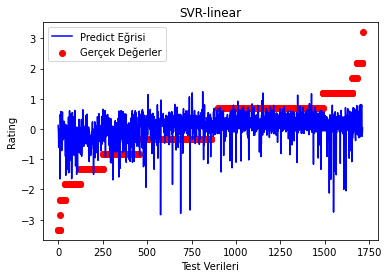

In [20]:
from sklearn.svm import SVR
svr_reg=SVR(kernel='linear')
svr_reg.fit(x_olcekli,y_olcekli)

#plt.scatter(x_olcekli,y_olcekli)
#plt.plot(x_olcekli,svr_reg.predict(x_olcekli))

df4=pd.DataFrame(data=y_olcekli)
df4["predict"]=svr_reg.predict(x_olcekli)
df4=df4.rename(columns={0: "rating"})
df4=df4.sort_values(by="rating")

fig, ax4 = plt.subplots()
ax4.scatter(range(0,1713,1), df4["rating"],color="red",label="Gerçek Değerler")
ax4.plot(range(0,1713,1), df4["predict"],"b",label="Predict Eğrisi")
ax4.set(xlabel='Test Verileri', ylabel='Rating',
       title='SVR-linear')
plt.legend()
plt.show()
##print(x_olcekli)
##df4["rating"]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


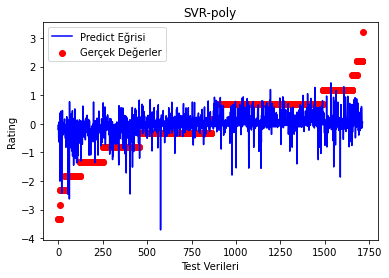

In [21]:
from sklearn.svm import SVR
svr_reg=SVR(kernel='poly')
svr_reg.fit(x_olcekli,y_olcekli)

#plt.scatter(x_olcekli,y_olcekli)
#plt.plot(x_olcekli,svr_reg.predict(x_olcekli))

df4=pd.DataFrame(data=y_olcekli)
df4["predict"]=svr_reg.predict(x_olcekli)
df4=df4.rename(columns={0: "rating"})
df4=df4.sort_values(by="rating")

fig, ax4 = plt.subplots()
ax4.scatter(range(0,1713,1), df4["rating"],color="red",label="Gerçek Değerler")
ax4.plot(range(0,1713,1), df4["predict"],"b",label="Predict Eğrisi")
ax4.set(xlabel='Test Verileri', ylabel='Rating',
       title='SVR-poly')
plt.legend()
plt.show()
##print(x_olcekli)
##df4["rating"]

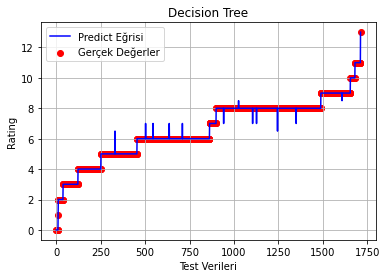

In [22]:
##DecisionTree Regressor
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor(random_state=0)
X=x_test.values
Y=y_test.values
DT.fit(X,Y)

dfDT=pd.DataFrame(data=y_test)
dfDT["predict"]=DT.predict(X)
dfDT=dfDT.rename(columns={0: "rating"})
dfDT=dfDT.sort_values(by=["rating"])


fig, ax = plt.subplots()
ax.scatter(range(0,1713,1), dfDT["rating"],color="red",label="Gerçek Değerler")
ax.plot(range(0,1713,1), dfDT["predict"],color="blue",label="Predict Eğrisi")
ax.set(xlabel='Test Verileri', ylabel='Rating',title='Decision Tree')
ax.grid()
plt.legend()
plt.show()

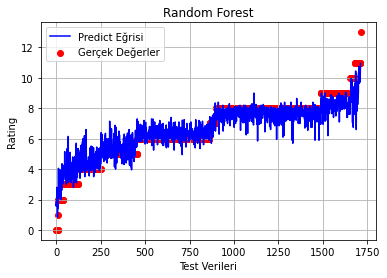

In [23]:
##Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=20,random_state=0)
X=x_test.values
Y=y_test.values
RF.fit(X,Y.ravel())

dfRF=pd.DataFrame(data=y_test)
dfRF["predict"]=RF.predict(X)
dfRF=dfRF.rename(columns={0: "rating"})
dfRF=dfRF.sort_values(by=["rating"])

fig, ax = plt.subplots()
ax.scatter(range(0,1713,1), dfRF["rating"],color="red",label="Gerçek Değerler")
ax.plot(range(0,1713,1), dfRF["predict"],color="blue",label="Predict Eğrisi")
ax.set(xlabel='Test Verileri', ylabel='Rating',title='Random Forest')
ax.grid()
plt.legend()
plt.show()

In [24]:
## R2                                                  ##Regresyon algoritmalarımızın karşılaştırılması karşılaştırması
from sklearn.metrics import r2_score

veri = {
  "R2": [r2_score(y_test,RF.predict(X)), r2_score(y_test,DT.predict(X)), r2_score(y_olcekli,svr_reg.predict(x_olcekli)),
        r2_score(y_test,linReg.predict(polyReg.fit_transform(X))), r2_score(y_test,LR.predict(x_test))]
}
pd.DataFrame(data=veri,index = ["Random Forest", "Decision Tree", "SVR","Polynomial Reg","Linear Reg"])
##Decision tree de over fitting olduğunu düşünüyorum

,R2
Random Forest,0.854106
Decision Tree,0.998078
SVR,0.083415
Polynomial Reg,0.173681
Linear Reg,0.076938


In [ ]:
###################################  Şablon  ##################################

## LabelEncoder kategoric veriyi sayısala dönüştürüyoruz
from sklearn import preprocessing
data=pd.read_csv("netflix_titles.csv")
lb=preprocessing.LabelEncoder()

yedekKolon1=lb.fit_transform(data[["show_id"]])
data["show_id"]=yedekKolon1

##OneHotEncoder Şablon kod
data_yedek=pd.read_csv("netflix_titles.csv")
yedek=data_yedek.iloc[:,1:2].values##1:2 -> yani type kolonu
lb=preprocessing.LabelEncoder()
yedek[:,0]=lb.fit_transform(data_yedek.iloc[:,1]) ##data_yedek.iloc[:,1] -> type kolonu 

ohe=preprocessing.OneHotEncoder()
yedek=ohe.fit_transform(yedek).toarray()
print(yedek)

yedek=pd.DataFrame(yedek)
yedek.head(20)

##Backward Elimination
import statsmodels.api as sm

data["ekKolon B0 için"]=np.ones(5189)
data_BW=data.iloc[:,[0,1,2,3,4,6]].values
data_BW=np.array(data_BW,dtype=float)
model=sm.OLS(data.iloc[:,5],data_BW).fit()
print(model.summary())
## 0.05(hata payı P>|t|) den büyük olan kolonları çıkarıp tekrar kontrol ediyoruz.


##Linear-MultiLinear(more column than one) Predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,0:5] , data["rating"] , test_size=0.33,random_state=0)
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)


##sort and plot
df=pd.DataFrame(data=y_test)
df["predict"]=y_pred
df=df.sort_values(by=["rating"])

fig, ax = plt.subplots()
ax.scatter(range(0,1713,1), df2["rating"],color="red",label="Gerçek Değerler")
ax.plot(range(0,1713,1), df2["predict"],color="blue",label="Predict Eğrisi")
ax.set(xlabel='Test Verileri', ylabel='Rating',title='Multi Linear Regresyon')
ax.grid()
plt.legend()
plt.show()


## Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
polyReg=PolynomialFeatures(degree=2)#####
X=x_test.values
Y=y_test.values
Y=Y.reshape(-1,1)
x_poly=polyReg.fit_transform(X)

linReg=LinearRegression()
linReg.fit(x_poly,y_test)

pred=linReg.predict(polyReg.fit_transform(X))
pred=pd.DataFrame(pred)
pred=pred.sort_values(by=0)

## Scaler Ölçekleme
from sklearn.preprocessing import StandardScaler
X=x_test.values
Y=y_test.values

sc1=StandardScaler()
x_olcekli=sc1.fit_transform(X)
sc2=StandardScaler()
y_olcekli=sc2.fit_transform(Y.reshape(-1,1))

##Support Vector Regressiom *Ölçekli veri kullanmamız gerekiyor
from sklearn.svm import SVR
svr_reg=SVR(kernel='rbf')
svr_reg.fit(x_olcekli,y_olcekli)

df4=pd.DataFrame(data=y_olcekli)
df4["predict"]=svr_reg.predict(x_olcekli)
df4=df4.rename(columns={0: "rating"})
df4=df4.sort_values(by="rating")

fig, ax4 = plt.subplots()
ax4.scatter(range(0,1713,1), df4["rating"],color="red",label="Gerçek Değerler")
ax4.plot(range(0,1713,1), df4["predict"],"b",label="Predict Eğrisi")
ax4.set(xlabel='Test Verileri', ylabel='Rating',
       title='SVR-rbf')
plt.legend()
plt.show()


##DecisionTree Regressor
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor(random_state=0)
X=x_test.values
Y=y_test.values
DT.fit(X,Y)

dfDT=pd.DataFrame(data=y_test)
dfDT["predict"]=DT.predict(X)
dfDT=dfDT.rename(columns={0: "rating"})
dfDT=dfDT.sort_values(by=["rating"])

fig, ax = plt.subplots()
ax.scatter(range(0,1713,1), dfDT["rating"],color="red",label="Gerçek Değerler")
ax.plot(range(0,1713,1), dfDT["predict"],color="blue",label="Predict Eğrisi")
ax.set(xlabel='Test Verileri', ylabel='Rating',title='Multi Linear Regresyon')
ax.grid()
plt.legend()
plt.show()

##Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=20,random_state=0)
X=x_test.values
Y=y_test.values
RF.fit(X,Y.ravel())

dfRF=pd.DataFrame(data=y_test)
dfRF["predict"]=RF.predict(X)
dfRF=dfRF.rename(columns={0: "rating"})
dfRF=dfRF.sort_values(by=["rating"])

fig, ax = plt.subplots()
ax.scatter(range(0,1713,1), dfRF["rating"],color="red",label="Gerçek Değerler")
ax.plot(range(0,1713,1), dfRF["predict"],color="blue",label="Predict Eğrisi")
ax.set(xlabel='Test Verileri', ylabel='Rating',title='Random Forest')
ax.grid()
plt.legend()
plt.show()

## R2  ##Regresyon algoritmalarımızın karşılaştırılması karşılaştırması
from sklearn.metrics import r2_score

veri = {
  "R2": [r2_score(y_test,RF.predict(X)), r2_score(y_test,DT.predict(X)), r2_score(y_olcekli,svr_reg.predict(x_olcekli)),
        r2_score(y_test,linReg.predict(polyReg.fit_transform(X))), r2_score(y_test,LR.predict(x_test))]
}
pd.DataFrame(data=veri,index = ["Random Forest", "Decision Tree", "SVR","Polynomial Reg","Linear Reg"])